<a href="https://colab.research.google.com/github/seonleeuni/mge51101-20205196/blob/master/Neural_Networks_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## gituhb에 작성해야돼! 처음에 RUNTIME --> 유형? 그거를 GPU로 바꿔줘야함


In [2]:
!nvidia-smi
import numpy as np
import torch
import torch.nn as nn
import tensorflow as tf
import matplotlib.pyplot as plt

print("numpy version:{}, TF version:{}, PyTorch version:{}".format(np.__version__, tf.__version__, torch.__version__))

Thu Apr 23 09:15:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  



```
# 코드로 형식 지정됨
```

## Data import


In [3]:
import sys
sys.path.insert(0, "..")

import torchvision
import torchvision.transforms as transforms

#MNIST preprocessing
mnist_transform = transforms.Compose([
                                      transforms.ToTensor(),
])

mnist_train = torchvision.datasets.MNIST(root="./", 
                                         train = True, 
                                         download = True, 
                                         transform = mnist_transform)

mnist_test = torchvision.datasets.MNIST(root='./',
                                        train = False,
                                        download = True,
                                        transform = mnist_transform)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [0]:
from torch.utils.data import DataLoader

batch_size = 6
train_loader = DataLoader(mnist_train, batch_size = batch_size, shuffle= True)

torch.Size([6, 1, 28, 28])
tensor([3, 4, 0, 3, 3, 4])



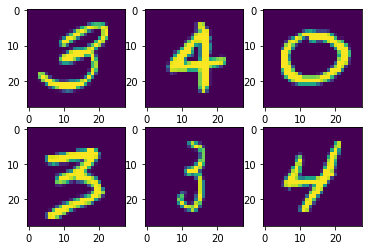

In [5]:
for x, y in train_loader:
  print(x.shape)
  print(y)
  fig = plt.figure()
  for i in range(batch_size):
    plt.subplot(2, batch_size // 2, i+1) #batch_size // 2 가 뭘까?
    plt.imshow(x[i].reshape(x[i].shape[1], -1))
  break

## making model

In [0]:
class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.layer = torch.nn.Linear(28*28, 10, bias = True) #Linear(in_feature, out_feature, bias = True or False)

  def forward(self,inputs):
    input = inputs.view(-1, 28*28) # match dimension
    outputs = self.layer(input)
    return outputs

model = LinearRegressionModel() #GPU 사용

In [7]:
print(model.layer.weight.data.shape)
print(model.layer.bias.data.shape)

torch.Size([10, 784])
torch.Size([10])


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)


test accuracy: 87.8 %
epoch:1, train_loss:0.5454, test_loss:0.4837

test accuracy: 91.4 %
epoch:11, train_loss:0.3301, test_loss:0.1410

test accuracy: 91.9 %
epoch:21, train_loss:0.2020, test_loss:0.3016

test accuracy: 92.0 %
epoch:31, train_loss:0.2959, test_loss:0.2147

test accuracy: 92.2 %
epoch:41, train_loss:0.1809, test_loss:0.1634

test accuracy: 92.1 %
epoch:51, train_loss:0.2799, test_loss:0.3183

test accuracy: 92.2 %
epoch:61, train_loss:0.3228, test_loss:0.1913

test accuracy: 92.3 %
epoch:71, train_loss:0.3086, test_loss:0.3987

test accuracy: 92.3 %
epoch:81, train_loss:0.1849, test_loss:0.2910

test accuracy: 92.5 %
epoch:91, train_loss:0.4586, test_loss:0.1470

test accuracy: 92.3 %
epoch:101, train_loss:0.2300, test_loss:0.4012

test accuracy: 92.4 %
epoch:111, train_loss:0.2147, test_loss:0.5533

test accuracy: 92.4 %
epoch:121, train_loss:0.3598, test_loss:0.3112

test accuracy: 92.4 %
epoch:131, train_loss:0.3408, test_loss:0.2879

test accuracy: 92.5 %
epoch:14

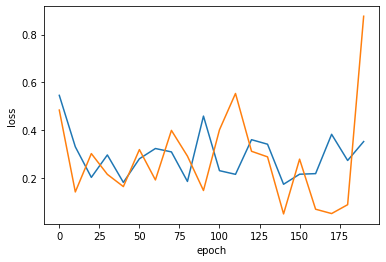

In [9]:
batch_size = 128 #왜 batch_size 가 이렇게 크지..?
train_loader = DataLoader(mnist_train, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(mnist_test, batch_size = batch_size, shuffle = True)

num_epochs = 200 # 왜 num epochs 도 크지?
loss_graph = {'train':[], 'test':[], 'epoch':[]}

for epoch in range(num_epochs):
  for train_x, train_y in train_loader:
    train_predict = model(train_x)
    loss = criterion(train_predict, train_y)

    #backprogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if epoch % 10 ==0:
    loss = criterion(train_predict, train_y)
    loss_graph['train'].append(loss) #train loss

    cnt = 0
    for test_x, test_y in test_loader:

      with torch.autograd.no_grad():
        test_predict = model(test_x)
        correct = torch.sum(torch.argmax(test_predict, dim = 1)== test_y)
        cnt += correct.cpu().numpy() # test accuracy

    loss_test = criterion(test_predict, test_y)
    loss_graph['test'].append(loss_test)
    loss_graph['epoch'].append(epoch)

    print("\ntest accuracy: {:.1f} %".format(100*cnt/10000))
    print("epoch:{}, train_loss:{:.4f}, test_loss:{:.4f}".format(epoch+1, loss, loss_test))

plt.plot(loss_graph['epoch'], loss_graph['train'])
plt.plot(loss_graph['epoch'], loss_graph['test'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()